<a href="https://colab.research.google.com/github/monaag/The-Sparks-Foundation-Intern-Tasks/blob/main/Task%232%20prediction%20using%20unsupervised%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mona Galal Faried

#Task #2 Prediction using unsupervised ML.

In [99]:
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [98]:
# Load dataset.
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


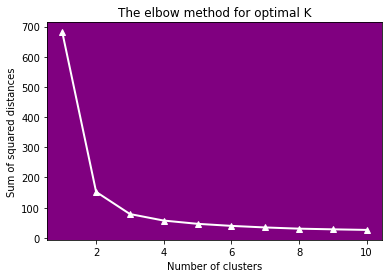

In [121]:
# Find the optimum no. of clusters.

x = data.iloc[:, [0, 1, 2, 3]].values
arr = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)

# The optimum clusters is where the elbow occurs.    
plt.plot(range(1, 11), arr, '^w-')
ax = plt.axes()
ax.set_facecolor("purple") 
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances') 
plt.show()

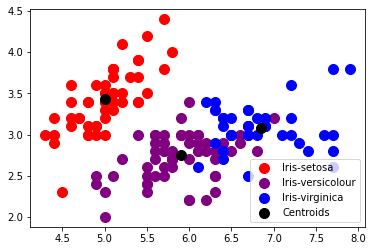

In [145]:
# Apply the optimum cluster.
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()